# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [5]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [13]:
tips = sns.load_dataset('tips')

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:

tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


(0.0, 10.5)

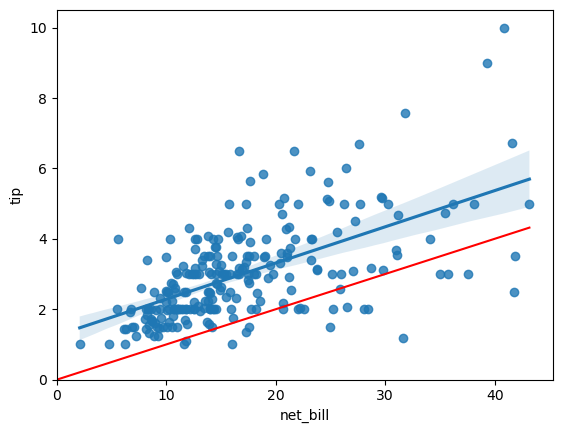

In [21]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [23]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        18:31:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.43571809320743227)

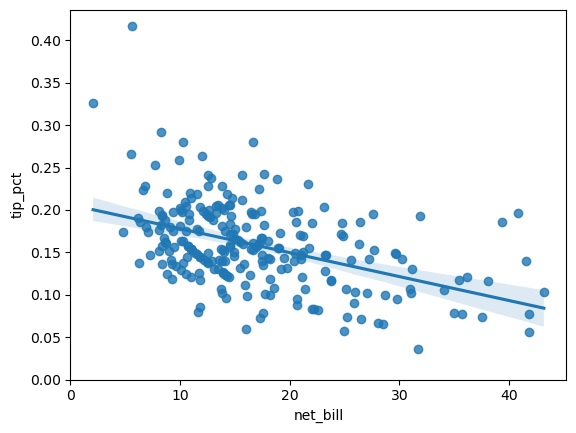

In [29]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])


plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [31]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.21e-12
Time:                        18:37:02   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2162      0.008     26.401      0.000       0.200       0.232
net_bill      -0.0033      0.000     -7.500      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      227.090   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8183.493
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                      30.512   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico indica que gorjetas maiores tendem a ocorrer com contas maiores, enquanto que o segundo gráfico deixa evidente que quanto maior a conta, menor será a proporção da gorjeta.
Não é apropriado comparar os dois coeficientes de determinação, pois são modelos treinados em duas variaveis dependentes diferentes, uma comparação direta do R2 só faz sentido quando as variáveis dependentes têm a mesma escala e natureza

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [35]:
reg.fittedvalues


0      0.163469
1      0.187573
2      0.158418
3      0.148974
4      0.146960
         ...   
239    0.139927
240    0.133092
241    0.147984
242    0.163172
243    0.164130
Length: 244, dtype: float64

In [43]:
tip_pct_pred = reg.fittedvalues
tip_pred = tip_pct_pred * tips['net_bill']
tip = tips['tip']

SSR = ((tip - tip_pred) ** 2).sum()
SST = ((tip - tip.mean()) ** 2).sum()
R2_tip = 1 - SSR / SST
R2_tip

0.15088205148178835

O R2 esta menor do que no item 1, mostrando que ajustar diretamente o modelo para 'tip' fornece uma previsão mais precisa para a variável dependente do que usar 'tip_pct' como intermediário. Indicando tambem que a relação entre 'tip_pct' e n'et_bill' é negativa e não linear.